In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
import tensorflow as tf

In [43]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard

In [26]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [27]:
y_train = to_categorical(y_train)

In [28]:
x_train = np.array([np.reshape(i, (28,28)) for i in x_train])
x_train = x_train/255
x_train.shape

(60000, 28, 28)

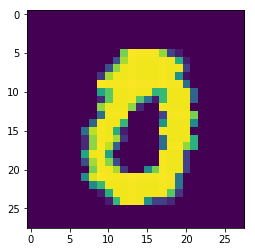

In [29]:
plt.imshow(x_train[69])

In [30]:
x_train_train, x_val, y_train_train, y_val = train_test_split(x_train, y_train, test_size=0.0833, random_state = 47)

In [31]:
x_train_train = x_train_train.reshape(x_train_train.shape[0], 28,28,1)
x_val = x_val.reshape(x_val.shape[0], 28,28,1)

In [38]:
y_val.shape

(4998, 10)

In [44]:
model = Sequential()

In [45]:
model.add(Conv2D(8, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(16, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               48120     
_________________________________________________________________
dropout_4 (Dropout)          (None, 120)               0         
__________

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
tensor_board = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

In [49]:
history = model.fit(x_train_train, y_train_train, validation_data=(x_val, y_val), epochs=50, batch_size=256, callbacks=[tensor_board])

Train on 55002 samples, validate on 4998 samples
Epoch 1/50
55002/55002 [==============================] - 17s 315us/step - loss: 0.6301 - acc: 0.7991 - val_loss: 0.1348 - val_acc: 0.9600
Epoch 2/50
55002/55002 [==============================] - 13s 241us/step - loss: 0.1820 - acc: 0.9461 - val_loss: 0.0810 - val_acc: 0.9754
Epoch 3/50
55002/55002 [==============================] - 15s 276us/step - loss: 0.1271 - acc: 0.9618 - val_loss: 0.0620 - val_acc: 0.9828
Epoch 4/50
55002/55002 [==============================] - 13s 233us/step - loss: 0.1031 - acc: 0.9697 - val_loss: 0.0554 - val_acc: 0.9830
Epoch 5/50
55002/55002 [==============================] - 16s 282us/step - loss: 0.0882 - acc: 0.9739 - val_loss: 0.0539 - val_acc: 0.9852
Epoch 6/50
55002/55002 [==============================] - 14s 250us/step - loss: 0.0787 - acc: 0.9768 - val_loss: 0.0483 - val_acc: 0.9854
Epoch 7/50
55002/55002 [==============================] - 13s 239us/step - loss: 0.0695 - acc: 0.9794 - val_loss: 0.0

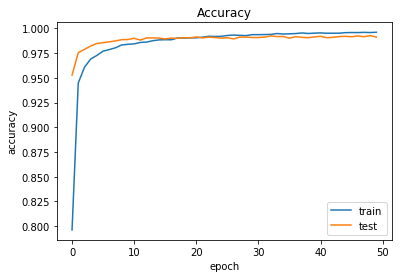

In [51]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [54]:
x_test.shape

(10000, 28, 28)

In [55]:
y_test = to_categorical(y_test)

In [57]:
x_test = np.array([np.reshape(i, (28,28)) for i in x_test])
x_test = x_test/255
x_test.shape

(10000, 28, 28)

In [62]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [63]:
x_test.shape

(10000, 28, 28, 1)

In [64]:
predictions = model.predict(x_test)

In [67]:
ans = np.argmax(predictions, axis=1)

In [70]:
y_test = np.argmax(y_test,axis=1)

In [77]:
print("test accuracy:", accuracy_score(y_test,ans))

test accuracy: 0.9907


In [75]:
confusion_matrix(y_test, ans)

array([[ 976,    1,    1,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1133,    1,    0,    0,    0,    1,    0,    0,    0],
       [   2,    2, 1020,    1,    1,    0,    1,    3,    2,    0],
       [   0,    1,    0, 1002,    0,    4,    0,    1,    2,    0],
       [   0,    1,    0,    0,  973,    0,    1,    0,    0,    7],
       [   1,    0,    1,    6,    0,  882,    1,    1,    0,    0],
       [   7,    2,    0,    1,    1,    1,  945,    0,    1,    0],
       [   1,    4,    4,    1,    0,    0,    0, 1016,    1,    1],
       [   1,    0,    1,    2,    0,    0,    0,    1,  968,    1],
       [   0,    3,    2,    0,    6,    1,    0,    3,    2,  992]])